### Grafico la fig 3.9 loewen: $\Sigma_{gas}$, $\Sigma_{baryon}$ vs $\Sigma_{SFR}$

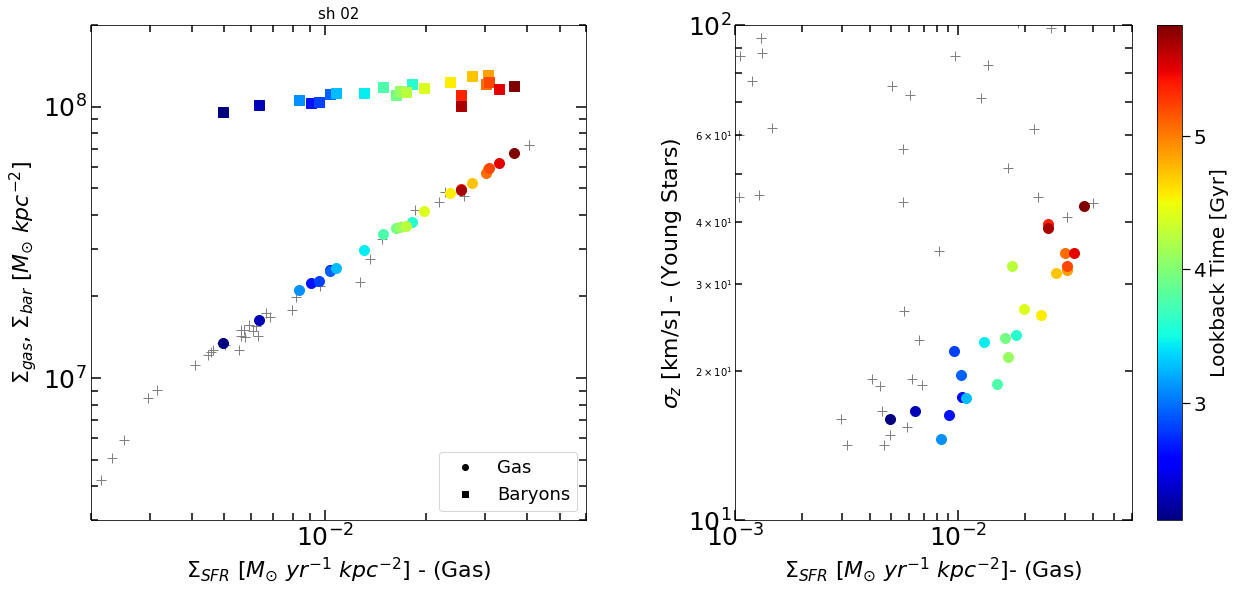

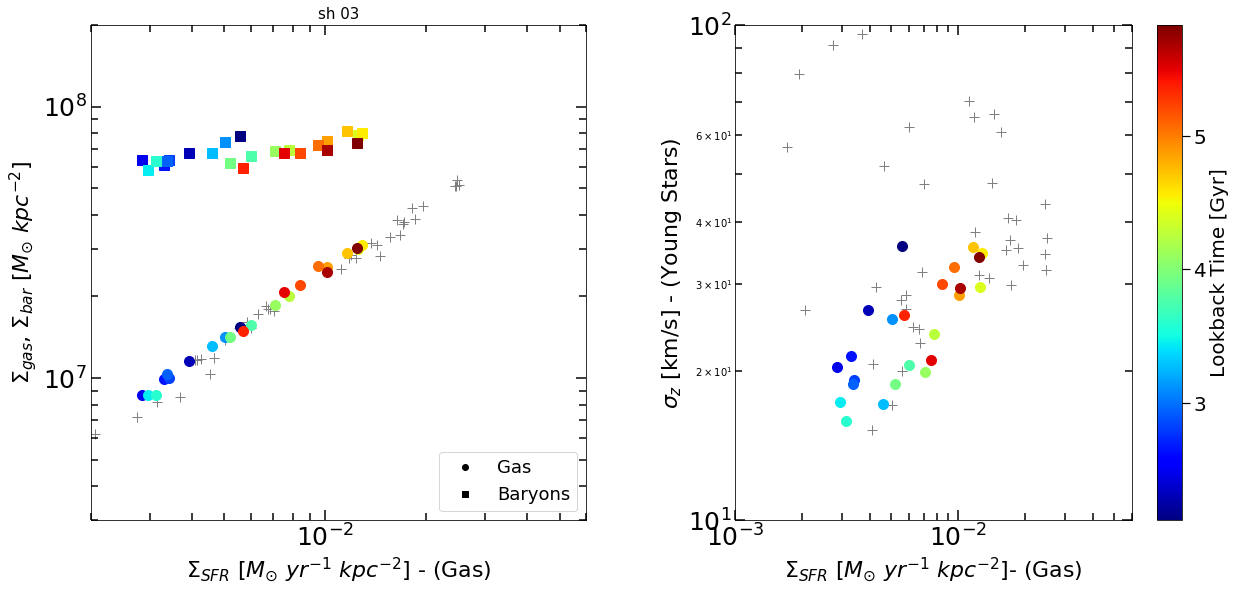

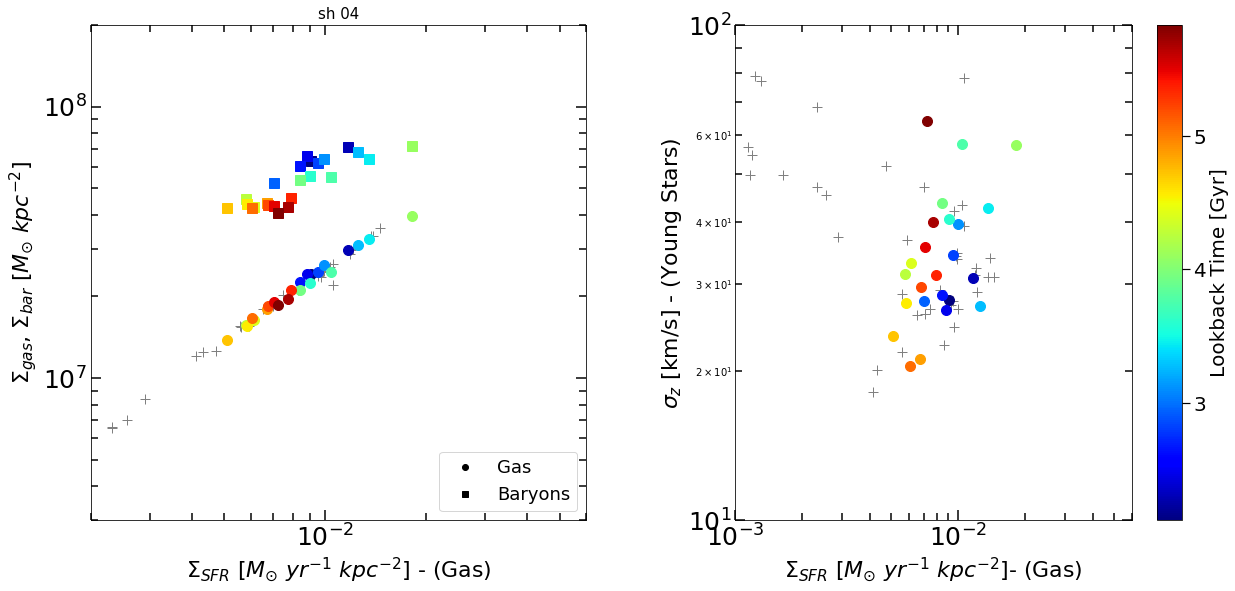

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

r50 = np.loadtxt('../_data/r50.dat')[:,1]

for i in range(3): 
    Id = ''
    for aux in list(str('%d'%ID[i]))[-2:]:
        Id += aux
        
    
    data2 = np.loadtxt('../_data/Fig3.5/fig3.5_snap_sh'+Id+'.dat')
    
    tiempo      = data2[:,0]
    sigma_z_str = data2[:,1]
    Sig_str     = data2[:,6]
    SSFR_gas    = data2[:,11]
    Sig_gas     = data2[:,12]
    
    Sig_str_all = np.loadtxt('../_data/Fig3.5/fig3.5_starsall_sh'+Id+'.dat')
    
    Sig_baryon = Sig_str + Sig_gas
    Sig_baryon_all = Sig_str_all + Sig_gas
    
    # mask, = np.where((tiempo>0) & (tiempo<14))
    mask, = np.where((tiempo>=2) & (tiempo<=6))
                     
    norm = mpl.colors.Normalize(vmin = tiempo[mask].min(),vmax= tiempo[mask].max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'jet')
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    fig.subplots_adjust(bottom=0.10, left =0.10, right = 0.98,top=0.96, hspace=0.05, wspace=0.3)
    
    cbar = fig.colorbar(cmap,ticks=[0,1,2,3,4,5,6]) #pad=0.01)
    cbar.set_label('Lookback Time [Gyr]',fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.tick_params(length=8, width=1.2, which='major')

    for j in range(len(tiempo[mask])):
        
        ax[0].plot(SSFR_gas[mask][j],Sig_gas[mask][j],'o',ms=10,color = cmap.to_rgba(tiempo[mask][j]))
        # ax[0].plot(SSFR_gas[mask][j],Sig_baryon[mask][j],'^',ms=10,color = cmap.to_rgba(tiempo[mask][j]))
        ax[0].plot(SSFR_gas[mask][j],Sig_baryon_all[mask][j],'s',ms=10,color = cmap.to_rgba(tiempo[mask][j]))
        # ax[0].plot(SSFR_gas[mask][j],Sig_str[mask][j],'*',ms=10,color = cmap.to_rgba(tiempo[mask][j]))
        # ax[0].plot(SSFR_gas[mask][j],Sig_str_all[mask][j],'v',ms=10,color = cmap.to_rgba(tiempo[mask][j]))
        ax[1].plot(SSFR_gas[mask][j],sigma_z_str[mask][j],'o',ms=10,color = cmap.to_rgba(tiempo[mask][j]))
    
    ax[0].plot(-1,-1, 'ko', label='Gas')
    # ax[0].plot(-1,-1, 'k^', label='Str+Gas')
    ax[0].plot(-1,-1, 'ks', label='Baryons')
    # ax[0].plot(-1,-1, 'k*', label='Star')
    # ax[0].plot(-1,-1, 'kv', label='StarAll')
    ax[0].plot(SSFR_gas, Sig_gas,'+',ms=10,color = 'gray', zorder=1)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_xlim(2e-3,6e-2)
    ax[0].set_ylim(3e6,2e8)
    ax[0].minorticks_on()
    ax[0].tick_params(labelsize=25)
    ax[0].tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax[0].tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax[0].set_xlabel('$\Sigma_{SFR}$ [$M_{\odot}$ $yr^{-1}$ $kpc^{-2}$] - (Gas)',fontsize=22)
    ax[0].set_ylabel('$\Sigma_{gas}$, $\Sigma_{bar}$ [$M_{\odot}$ $kpc^{-2}$]',fontsize=22)
    ax[0].set_title('sh '+Id, fontsize=15)
    ax[0].legend(fontsize=18,fancybox=True,loc=4)
    
    ax[1].plot(SSFR_gas,sigma_z_str,'+',ms=10,color = 'gray', zorder=1)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_xlim(1e-3,6e-2)
    ax[1].set_ylim(1e1,1e2)
    ax[1].minorticks_on()
    ax[1].tick_params(labelsize=25)
    ax[1].tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax[1].tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax[1].set_xlabel('$\Sigma_{SFR}$ [$M_{\odot}$ $yr^{-1}$ $kpc^{-2}$]- (Gas)',fontsize=22)
    ax[1].set_ylabel('$\sigma_z$ [km/s] - (Young Stars)',fontsize=22)
    

    plt.show()
    
    fig.savefig('../_imagenes/SFR/SFR_sigmaz_gas_sh'+Id+'.png',dpi=100, xxbox_inches='tight') 